In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Unpickle the data
## This is cleaned data with all features, including dummies for categorical variables.
df = pd.read_pickle('intial_data_all_features')
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,23,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,41,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,27,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,11,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,17,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(1071, 38)

In [3]:
## drop experiment
#df = df.drop(columns = ['domestic_gross', 'opening_dollars'])
df = df.drop(columns = ['opening_dollars','title_length', 'Drama', 'Fantasy',
                       'Crime', 'Family', 'Romance', 'Biography', 'Horror', 'Mystery',
                       'History', 'Sport', 'War', 'Musical', 'Documentary', 'Music',
                       'Western', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Sci-Fi',
                       'Animation'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,0,0,1,0,0,0,1,0


In [4]:
## drop audience ratings
df = df.drop(columns = ['Not Rated', 'PG', 'PG-13', 'R', 'Unrated'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,0,1,0


In [5]:
df.shape

(1176, 10)

In [6]:
## Separate target and other features
X = df.drop(columns = ['international_gross', 'name'])
y = df['international_gross']
y.head()

0    1.027000e+09
1    2.076897e+08
2    2.885000e+08
3    1.959797e+08
4    5.532236e+08
Name: international_gross, dtype: float64

In [7]:
## Split into train/validate/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [8]:
X_train.shape, y_train.shape

((940, 8), (940,))

In [9]:
model = LinearRegression()
reg_mod = model.fit(X_train, y_train)

In [10]:
predictions = model.predict(X_train)
mean_absolute_error(y_train, predictions)

49065380.14055344

In [11]:
model.score(X_train, y_train)

0.7321802203956962

In [12]:
model.intercept_

-112227093.26207332

In [13]:
model.coef_

array([ 1.49996080e+00,  1.00440109e+06,  6.48636953e+04, -5.33196043e+03,
        2.86543347e+07,  5.61920534e+06,  2.43481906e+06, -1.71303043e+07])

In [14]:
lm = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 6)
lm_cv = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'r2')
print(lm_cv)

[0.73467912 0.62368404 0.83537769 0.66052986 0.69758283]


In [15]:
lm_cv_mae = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'neg_mean_absolute_error')
print(lm_cv_mae)

[-51986930.50213853 -52982490.22315127 -45078739.03373718
 -55612523.406281   -46325357.60584562]


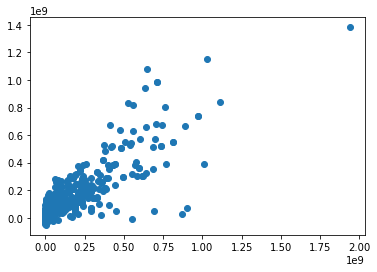

In [16]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred)
#plt.plot()

Text(0.5, 1.0, 'Residuals vs. Predictions')

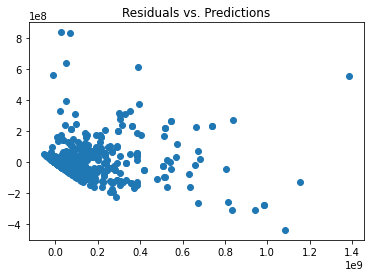

In [17]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.title("Residuals vs. Predictions")

## VIF

In [18]:
## Check VIF becasue I know from MVP that there may be some multicollinearity issues.
## Code adapted from Collinearity slides

VIF_x = X_train
VIF_x = sm.add_constant(X_train)
VIF_y = y_train
sm_model = sm.OLS(VIF_y, VIF_x)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     international_gross   R-squared:                       0.732
Model:                             OLS   Adj. R-squared:                  0.730
Method:                  Least Squares   F-statistic:                     318.2
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):          3.07e-260
Time:                         21:08:42   Log-Likelihood:                -18573.
No. Observations:                  940   AIC:                         3.716e+04
Df Residuals:                      931   BIC:                         3.721e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.122e+08   2.17e+07     -5.175      0.000   -1.55e+08   -6.97e+07
domestic_gross                 1.5000      0.044     34.121      0.000       1.414       1.586
running_time_mins           1.004e+06    1.7e+05      5.916      0.000    6.71e+05    1.34e+06
days_in_release             6.486e+04   2.21e+04      2.932      0.003    2.14e+04    1.08e+05
widest_release_in_theatres -5331.9604   2849.155     -1.871      0.062   -1.09e+04     259.550
franchise                   2.865e+07   8.99e+06      3.188      0.001     1.1e+07    4.63e+07
Spring                      5.619e+06   8.81e+06      0.638      0.524   -1.17e+07    2.29e+07
Summer                      2.435e+06   8.56e+06      0.284      0.776   -1.44e+07    1.92e+07
Winter                     -1.713e+07    8.2e+06     -2.089      0.037   -3.32e+07   -1.04e+06
==============================================================================
Omnibus:                      720.116   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22464.232
Skew:                           3.176   Prob(JB):                         0.00
Kurtosis:                      26.091   Cond. No.                     8.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[51.49587144889945,
 1.9374184028408181,
 1.1166412131907621,
 1.2198641993528154,
 1.7070991071402903,
 1.4764536187926547,
 1.332710434932028,
 1.4288487048638032,
 1.4262434115209084]

In [25]:
## Let's try Lasso since we still have a lot of features and it will eliminate some
## Code adapted from Lasso slides and Lasso exercise answers


std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
train_r_squared = lasso.score(X_tr, y_train)
#test_r_squared = lasso.score(X_te, y_test)
#print(test_r_squared)
print(train_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
print(len(list(zip(X_train.columns, lasso.coef_))))


0.732180180248394
[('domestic_gross', 143503605.18059644), ('running_time_mins', 18880695.243159015), ('days_in_release', 9767918.426809752), ('widest_release_in_theatres', -7359320.880985227), ('franchise', 11691867.83499353), ('Spring', 2211313.019073962), ('Summer', 1010451.3525174989), ('Winter', -7532829.554239891)]
8


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
#r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
# print(r_squared_test)
print(alpha)


0.7321802203917251
100.0


Computing regularization path using the LARS ...


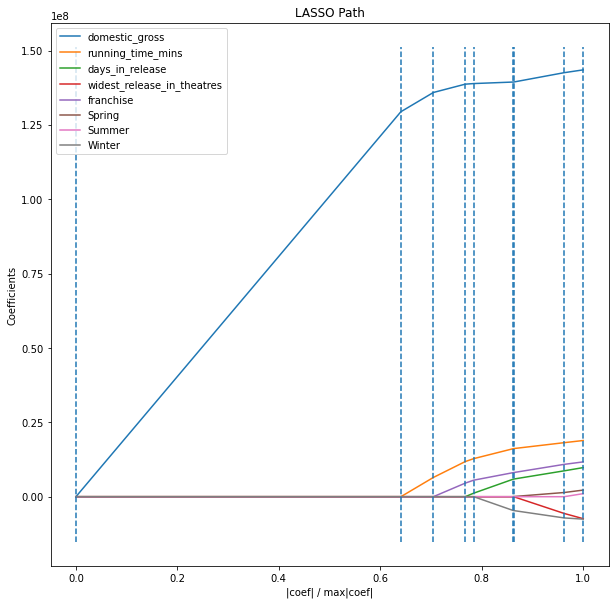

In [22]:
from sklearn.linear_model import lars_path
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

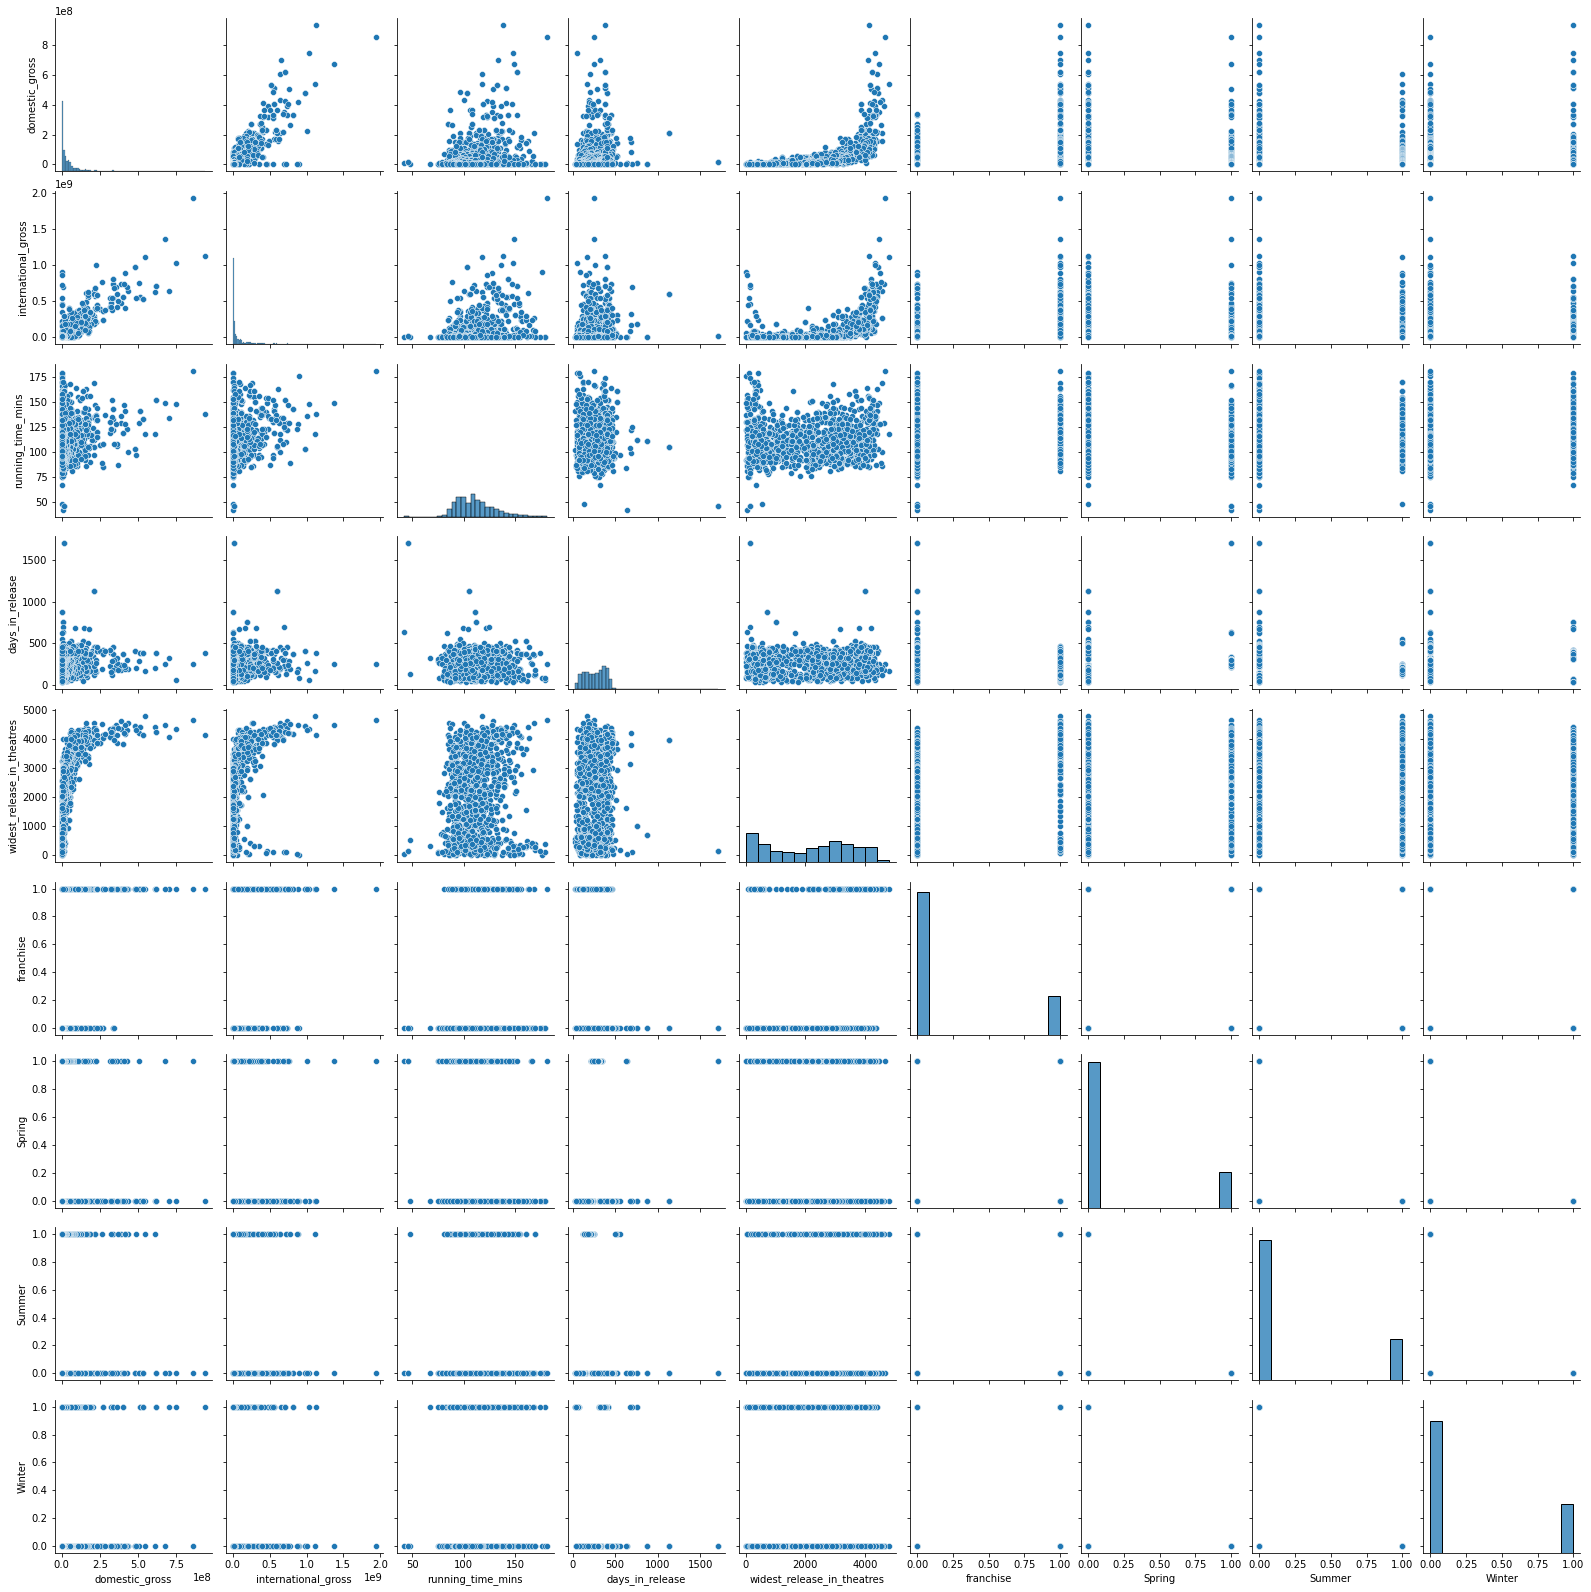

In [23]:
import seaborn as sns
sns.pairplot(df)